In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import linear_model
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head())
print(test.head())



      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


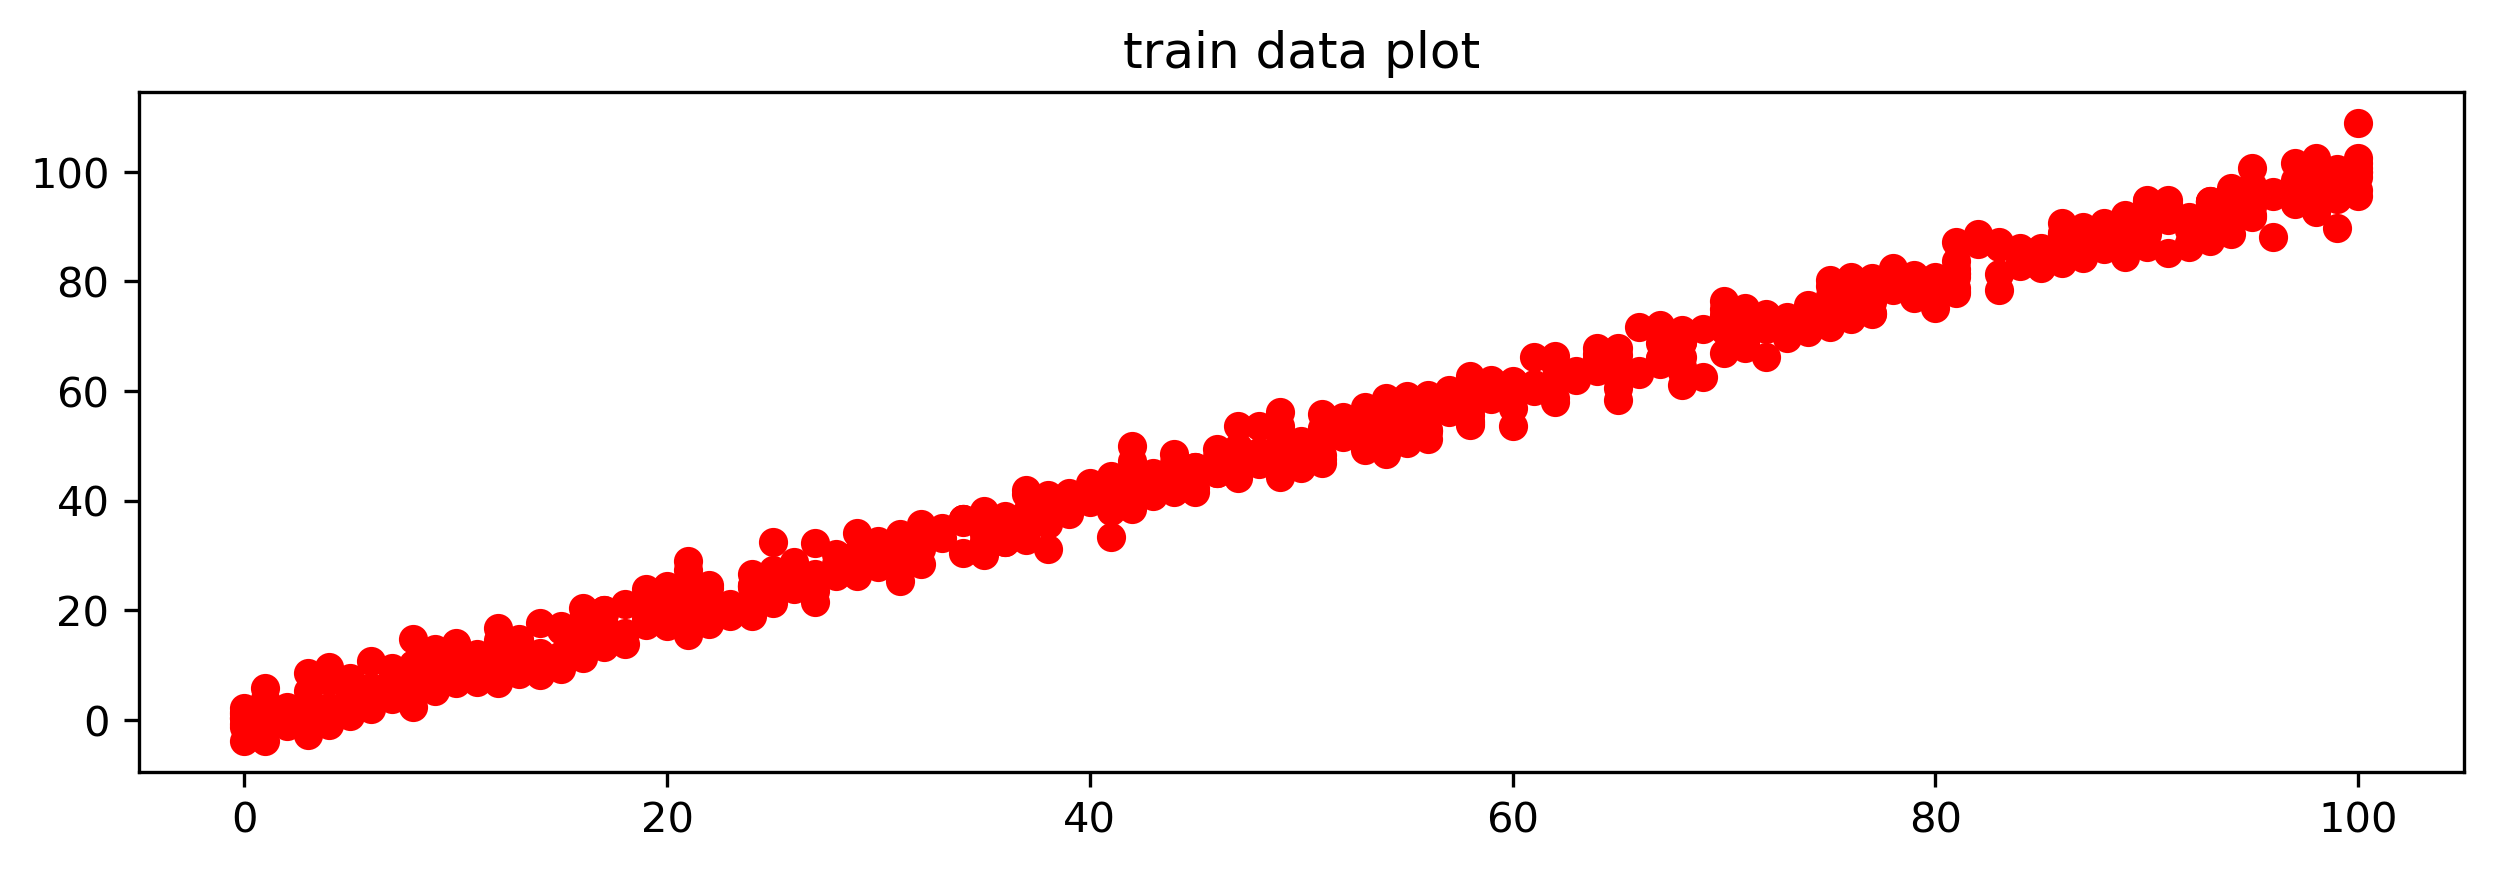

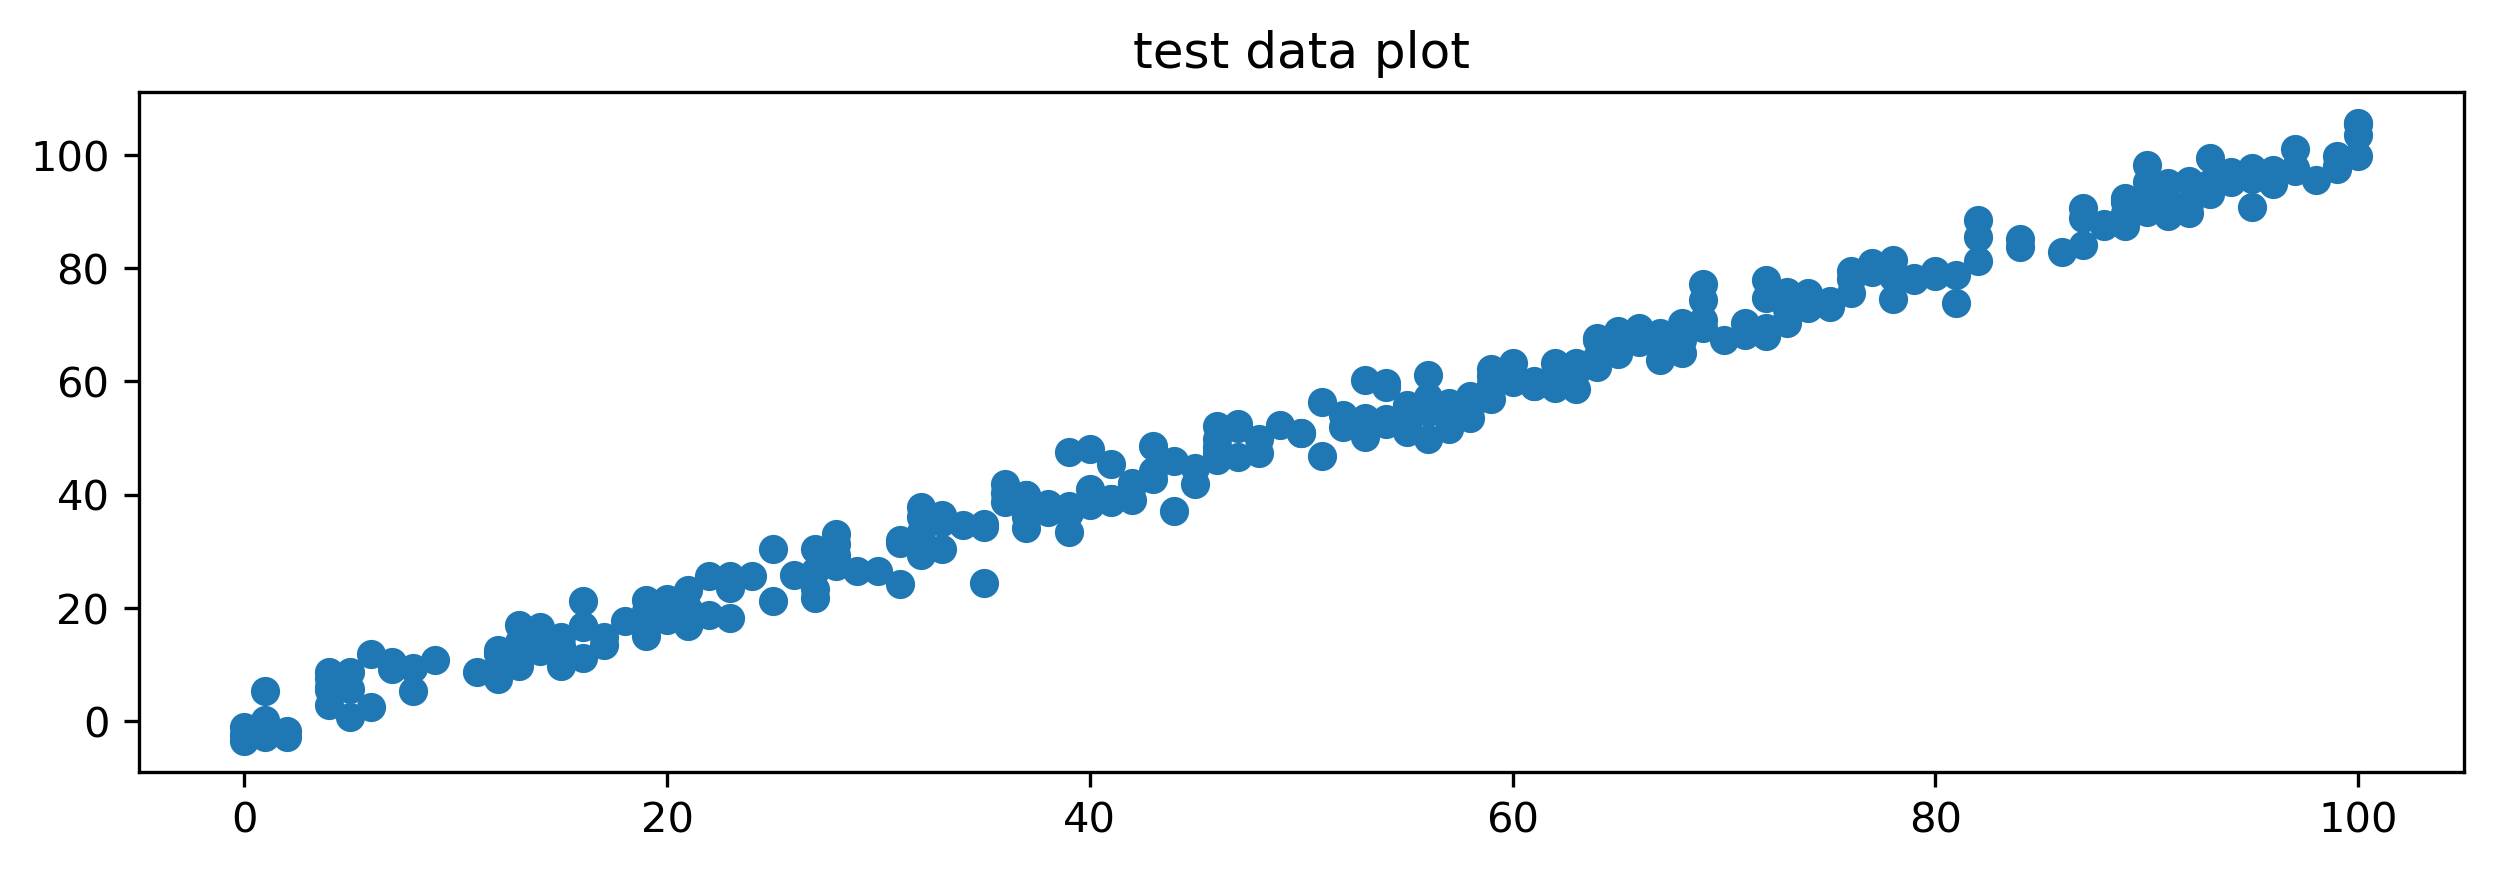

In [ ]:
plt.figure(figsize=(10,3), dpi=300)
plt.scatter(train.x, train.y, color='red')
plt.title("train data plot")
plt.show()
plt.figure(figsize=(10,3), dpi=300)
plt.scatter(test.x, test.y)
plt.title("test data plot")
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


Both the columns are of float type thus no string value. But, the no. of x> no. of y i.e y might have a missing value. 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [ ]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [ ]:
train.shape


(700, 2)

So now, the dataset has 700 rows i.e 700 entries/instances and 2 columns. In which one of them is our label and the other is a predictor. Looking at first few rows of the dataset

In [ ]:
train.sample(10) #gives random (10) rows

,x,y
432,29.0,34.072783
121,39.0,39.982389
514,55.0,53.983934
194,65.0,64.000777
339,17.0,13.249916
2,15.0,17.218656
259,53.0,49.926397
318,88.0,88.057893
84,83.0,81.428121
544,92.0,86.269370


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


oth the columns are of float type thus no string value. But, the no. of x> no. of y i.e y might have a missing value. Let's check

In [ ]:
train.isnull().sum()

x    0
y    1
dtype: int64

Now it is confirmed that y has a missing value. This can crerate issues, so there is the first data cleaning work. But, before let's see how the data looks mathematically.

In [ ]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


bove code shows that

x has a wide range of values if we look at the min and max values but the mean is way lesser than its maximum thus there might be some outliers also the 25%tile, 75%tile and 50%tile values show the same.
y also has a wide range but seems to be way more equally distributed than x

In [ ]:
#check for dublicates
train.duplicated().sum()

0

No duplicate values as duplicates can also alter the model in the worst way thus this step is important

In [ ]:
import seaborn as sns


Since there are only two numerical variables.

First, plot a Dist plot of individual attributes in order to check for each attribute's density.
Second, plot a scatter plot between both x and y to check what kind of relationship do they have.

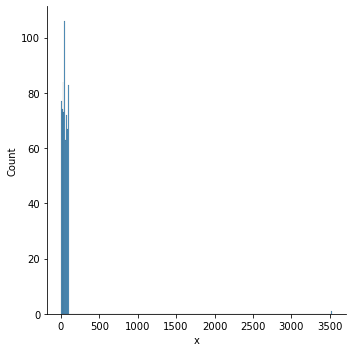

In [ ]:
#Distribution plot--x
sns.displot(train.x)

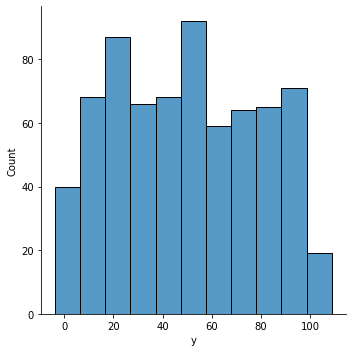

In [ ]:
#distribution of y
sns.displot(train.y)


c:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

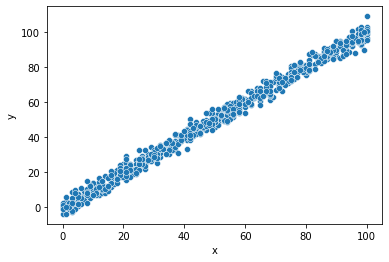

In [ ]:
#scatter plot
sns.scatterplot(train.x, train.y)


With this plot it is clear that x and y have a linear relationship

Here comes the Data cleaning part, as seen earlier y has a missing value. To solve this we have 3 options

Getting rid of x for that particular entry
Getting rid of the whole attribute--y
Set the values to some value(zero, mean, median)
The most logical option to choose for the given dataset is option 1 drop the whole entry.

In [ ]:
train_cleaned=train.dropna(subset=['y'])
train_cleaned.shape

(699, 2)

In [ ]:
train_cleaned.isnull().sum()

x    0
y    0
dtype: int64

Now, the data is cleaned i.e it dosen't contain any null value

Setting values of x and y

In [ ]:
x_train = np.array(train_cleaned.loc[:,['x']]).reshape(-1,1)
y_train = np.array(train_cleaned.loc[:,['y']]).reshape(-1,1)


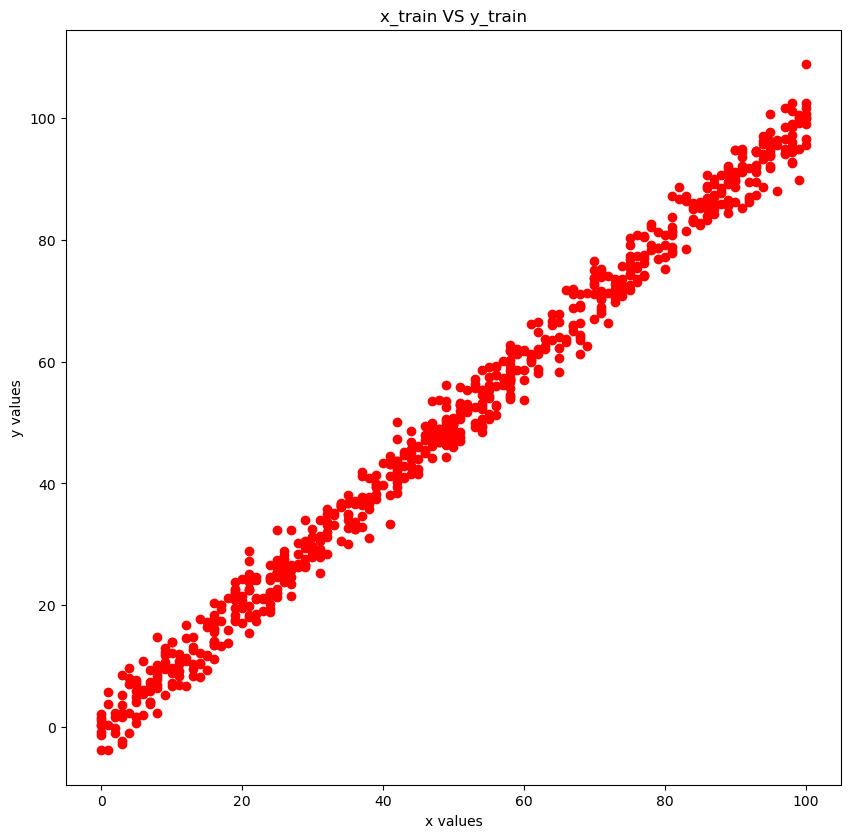

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
plt.title("x_train VS y_train")
plt.xlabel("x values")
plt.ylabel("y values")
plt.scatter(x_train, y_train, c='red')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

Before testing we need to remove any null or duplicates from the test data

In [ ]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [ ]:
test.duplicated().sum()

0

Now, let's start predicting

In [ ]:
x_test = np.array(test.loc[:,['x']]).reshape(-1,1)
y_test = np.array(test.loc[:,['y']]).reshape(-1,1)

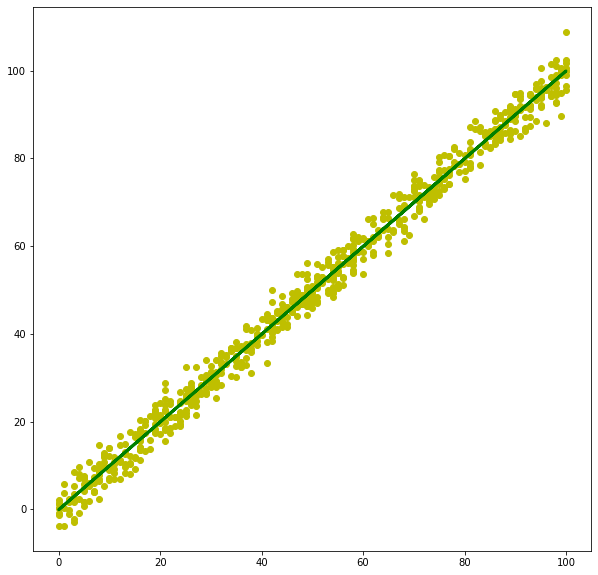

In [ ]:
y_prediction = reg.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train, c='y')
plt.plot(x_test,y_prediction, c='green', linewidth=3)
plt.show()

In [ ]:
#checking for error in prediction
#The root mean square performance measure
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(y_test,y_prediction)
lin_rmse=np.sqrt(lin_mse)

print(f"Variation in prediction is: {lin_rmse}")
print("mse:>>",lin_mse)

Variation in prediction is: 3.071306268029828
mse:>> 9.43292219203931


In [ ]:
output = reg.predict([[71]])
print("prediction of y >>", output)

prediction of y >> [[70.93933765]]


Steps:
Getting the data
Looking at the data
Looking at the Datatypes
Checking for null values
Checking for duplicates
Visualizing the data
Data cleaning
Predicting and finding error in prediction using test set
Final results